In [1]:
library(maftools)
library(ggplot2)

In [2]:
cnv=read.table("../zhong/esc/ESC_exome/work/structural/sequenza/GAINLOSS_2020/top_genes_gainloss.txt",stringsAsFactors = FALSE)

In [3]:
maf=read.maf("escc_all_sample.maf")

-Reading
-Validating
--Removed 2 duplicated variants
-Silent variants: 21329 
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  MUC16
  SYNE1
-Processing clinical data
--Missing clinical data
-Finished in 4.286s elapsed (7.155s cpu) 


In [4]:
cnv[cnv$V3=="EP300",] # these would be outliers

,V1,V2,V3
,<chr>,<chr>,<chr>
630,ESC00000000432,AMP,EP300
661,ESC00000000436,DeepDeletion,EP300


In [5]:
cnv[cnv$V3=="CREBBP",] # these would be outliers

,V1,V2,V3
,<chr>,<chr>,<chr>
721,ESC00000000458,DeepDeletion,CREBBP


Removed 1 mutations for which AA position was not available



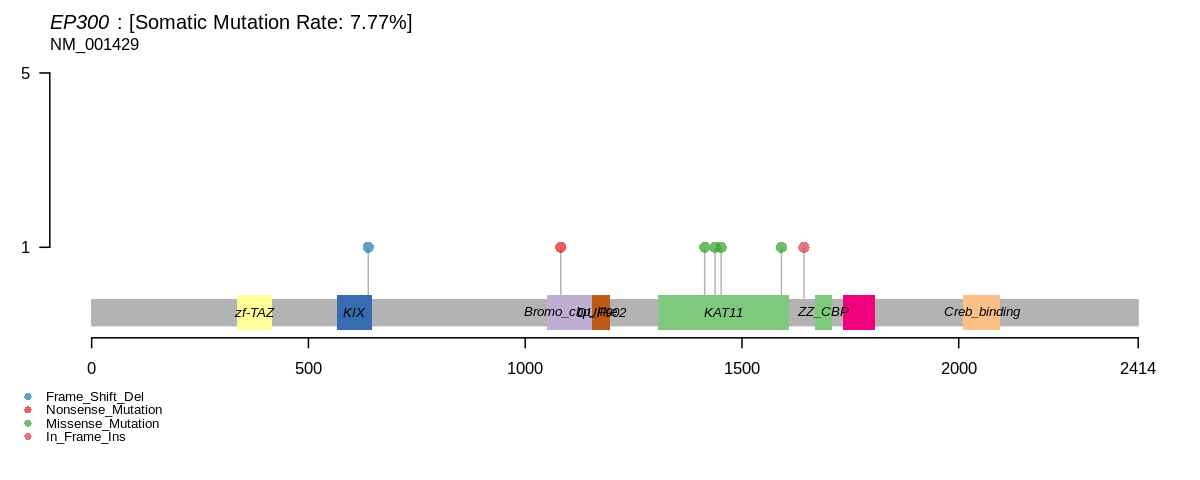

In [6]:
options(repr.plot.height=4,repr.plot.width=10)
lollipopPlot(maf = maf, gene = 'EP300', AACol = 'HGVSp', showMutationRate = TRUE)

In [7]:
mutations=maf@data

In [8]:
NMF=read.table("../sample_grouping_immune_RNAseqNMF.txt",sep="\t",stringsAsFactors = FALSE)
rownames(NMF)=gsub("T","",NMF$Sample_ordered)

In [9]:
clinic=read.table("../clinical20181008_modified.txt",sep="\t",header=TRUE,row.names=1)

In [10]:
clinic=clinic[rownames(NMF),]

In [11]:
EP300_mut=as.character(mutations$Tumor_Sample_Barcode[mutations$Hugo_Symbol=="EP300"])

In [12]:
CREBBP_mut=as.character(mutations$Tumor_Sample_Barcode[mutations$Hugo_Symbol=="CREBBP"])

In [13]:
CREBBP_mut

[1] "ESC00000000252" "ESC00000000267" "ESC00000000298" "ESC00000000331"
 [5] "ESC00000000345" "ESC00000000354" "ESC00000000363" "ESC00000000397"
 [9] "ESC00000000432" "ESC00000000452"

In [14]:
express=read.table("../different_express_final_2021.txt")

In [15]:
EP300=as.data.frame(t(express["ENSG00000100393",paste0(rownames(NMF),"T")]))

In [16]:
rownames(EP300)=gsub("T","",rownames(EP300))

In [17]:
EP300$Status="Wild"
EP300$Status1= "Wild"

In [18]:
EP300[EP300_mut,"Status"]="Mutated"
EP300[union(EP300_mut,CREBBP_mut),"Status1"]="Mutated"

In [19]:
EP300$Status=factor(EP300$Status,levels=c("Wild","Mutated"))
EP300$Status1=factor(EP300$Status1,levels=c("Wild","Mutated"))

In [20]:
head(EP300)

,ENSG00000100393,Status,Status1
,<dbl>,<fct>,<fct>
ESC00000000298,7.015603,Wild,Mutated
ESC00000000412,7.115053,Wild,Wild
ESC00000000464,6.962464,Wild,Wild
ESC00000000427,7.434220,Wild,Wild
ESC00000000413,7.343436,Wild,Wild
ESC00000000386,7.438745,Wild,Wild


In [21]:
EP300$Group=NMF[rownames(EP300),5]

In [22]:
stem_genes=as.data.frame(t(express[express$txgenes.rownames.table_all1....gene_name.. %in% c("XCL1","XCL2","CD160","SFRP1","WFDC2","VWA2","PEG10","LGR6"),
        paste0(rownames(EP300),"T")]))
colnames(stem_genes)=as.character(express[colnames(stem_genes),1])
EP300_stem=cbind(EP300[,c("Status","Group","ENSG00000100393")],stem_genes)

In [23]:
NMF1=NMF[setdiff(rownames(NMF),c("ESC00000000458","ESC00000000436")),]
NMF=NMF[setdiff(rownames(NMF),c("ESC00000000432","ESC00000000436")),]

In [24]:
EP300_old=EP300

In [26]:
EP300=EP300[rownames(NMF),]

png 
  2

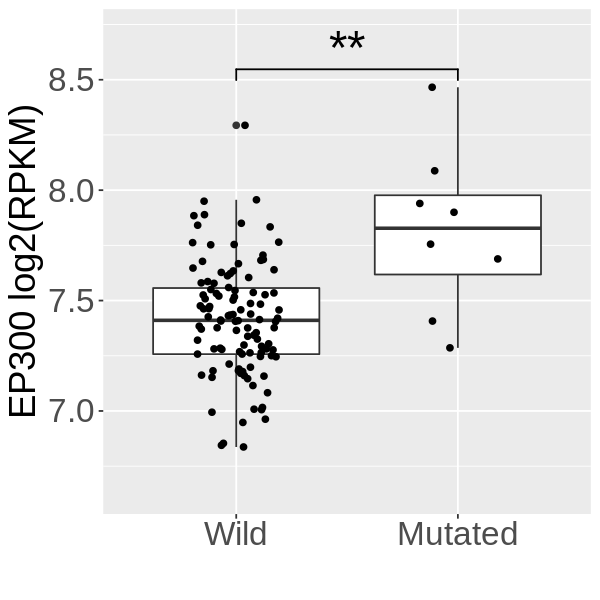

In [27]:
library(ggsignif)
options(repr.plot.width=5,repr.plot.height=5)
ggplot(EP300,aes(x=Status,y=ENSG00000100393))+
geom_boxplot()+geom_jitter(width=0.2)+
geom_signif(comparisons = list(c("Mutated","Wild")),textsize = 10,vjust = 0.0,map_signif_level = TRUE)+
labs(x="",y="EP300 log2(RPKM)")+ylim(min(EP300$ENSG00000100393)-0.2,max(EP300$ENSG00000100393)+0.25)+
theme(axis.text=element_text(size=20),
     axis.title=element_text(size=22))
pdf("EP300_mutation_express_boxplot.pdf",height=4,width=4)
ggplot(EP300,aes(x=Status,y=ENSG00000100393))+
geom_boxplot()+geom_jitter(width=0.2)+
geom_signif(comparisons = list(c("Mutated","Wild")),textsize = 10,vjust = 0.5,map_signif_level = TRUE)+
labs(x="",y="EP300 log2(RPKM)")+ylim(min(EP300$ENSG00000100393)-0.2,max(EP300$ENSG00000100393)+0.25)+
theme(axis.text=element_text(size=20),
     axis.title=element_text(size=22))
dev.off()

In [28]:
wilcox.test(ENSG00000100393~Status,EP300)


	Wilcoxon rank sum test with continuity correction

data:  ENSG00000100393 by Status
W = 159.5, p-value = 0.002723
alternative hypothesis: true location shift is not equal to 0


Warning message in wilcox.test.default(c(7.01560344900187, 7.11505347699059, 6.96246428061152, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(8.08760127742879, 7.9398588898126, 7.00792078955658, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(7.40635282508695, 7.76459464527682, 7.62218925636768, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(7.01560344900187, 7.11505347699059, 6.96246428061152, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(8.08760127742879, 7.9398588898126, 7.00792078955658, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(7.40635282508695, 7.76459464527682, 7.62218925636768, :
“cannot compute exact p-value with ties”


png 
  2

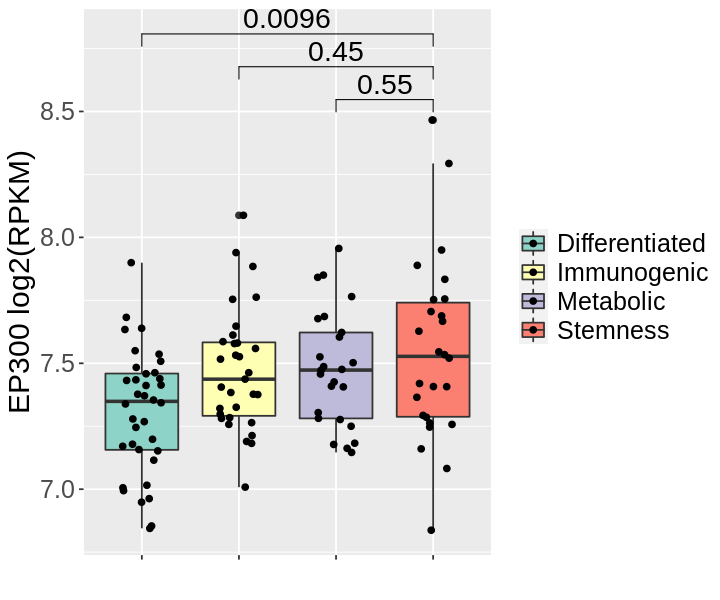

In [29]:
library(ggpubr)
library(RColorBrewer)
options(repr.plot.width=6,repr.plot.height=5)
ggplot(EP300,aes(x=Group,y=ENSG00000100393,fill=Group))+
geom_boxplot()+geom_jitter(width=0.2)+
scale_fill_manual(values=brewer.pal(4,"Set3"))+
labs(x="",y="EP300 log2(RPKM)")+
theme(axis.text=element_text(size=15),
      axis.text.x=element_blank(),
     axis.title=element_text(size=18),
     legend.text=element_text(size=15),
     legend.title=element_blank())+
stat_compare_means(comparisons = list(c(3,4),c(2,4),c(1,4)),step.increase = 0.08,size=6)
pdf("EP300_express_NMF.pdf",width=6,height=5)
ggplot(EP300,aes(x=Group,y=ENSG00000100393,fill=Group))+
geom_boxplot()+geom_jitter(width=0.2)+
scale_fill_manual(values=brewer.pal(4,"Set3"))+
labs(x="",y="EP300 log2(RPKM)")+
theme(axis.text=element_text(size=15),
      axis.text.x=element_blank(),
     axis.title=element_text(size=18),
     legend.text=element_text(size=15),
     legend.title=element_blank())+
stat_compare_means(comparisons = list(c(3,4),c(2,4),c(1,4)),step.increase = 0.08,size=6)
dev.off()

In [30]:
EP300_CREBBP=EP300_old[rownames(NMF1),]
EP300_CREBBP$e.os=clinic[rownames(NMF1),"is_dead"]
EP300_CREBBP$t.os=clinic[rownames(NMF1), "time2"]/12
samples=intersect(levels(mutations$Tumor_Sample_Barcode),rownames(EP300_CREBBP))
EP300_CREBBP=EP300_CREBBP[samples,]


In [31]:
EP300$e.os=clinic[rownames(EP300),"is_dead"]
EP300$t.os=clinic[rownames(EP300), "time2"]/12

In [32]:
samples=intersect(levels(mutations$Tumor_Sample_Barcode),rownames(EP300))
EP300=EP300[samples,]

In [33]:
library(survival)
library(survminer)

In [34]:
summary(coxph(Surv(EP300$t.os,EP300$e.os)~Status,EP300))

Call:
coxph(formula = Surv(EP300$t.os, EP300$e.os) ~ Status, data = EP300)

  n= 101, number of events= 52 

                coef exp(coef) se(coef)     z Pr(>|z|)    
StatusMutated 1.6579    5.2484   0.4152 3.993 6.52e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

              exp(coef) exp(-coef) lower .95 upper .95
StatusMutated     5.248     0.1905     2.326     11.84

Concordance= 0.566  (se = 0.026 )
Likelihood ratio test= 10.99  on 1 df,   p=9e-04
Wald test            = 15.95  on 1 df,   p=7e-05
Score (logrank) test = 19.86  on 1 df,   p=8e-06


In [35]:
summary(coxph(Surv(EP300_CREBBP$t.os,EP300_CREBBP$e.os)~Status1,EP300_CREBBP))

Call:
coxph(formula = Surv(EP300_CREBBP$t.os, EP300_CREBBP$e.os) ~ 
    Status1, data = EP300_CREBBP)

  n= 101, number of events= 52 

                 coef exp(coef) se(coef)     z Pr(>|z|)  
Status1Mutated 0.8015    2.2290   0.3420 2.344   0.0191 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               exp(coef) exp(-coef) lower .95 upper .95
Status1Mutated     2.229     0.4486      1.14     4.357

Concordance= 0.563  (se = 0.028 )
Likelihood ratio test= 4.69  on 1 df,   p=0.03
Wald test            = 5.49  on 1 df,   p=0.02
Score (logrank) test = 5.79  on 1 df,   p=0.02


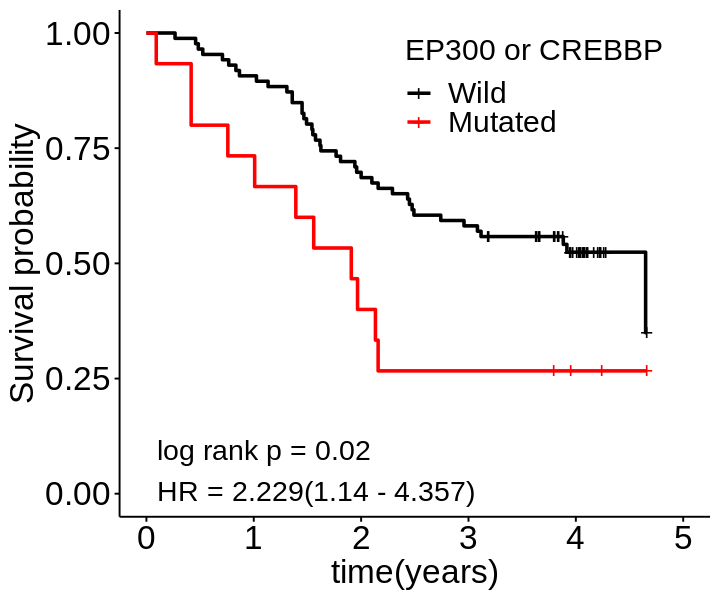

In [36]:

ggsurvplot(survfit(Surv(EP300_CREBBP$t.os,EP300_CREBBP$e.os)~Status1,EP300_CREBBP),EP300_CREBBP,palette = c("black","red"),
          pval="log rank p = 0.02\nHR = 2.229(1.14 - 4.357)",legend.title="EP300 or CREBBP",legend.labs=c("Wild","Mutated"),
            legend=c(0.7,0.85),pval.coord=c(0.1,0.05),
          xlab="time(years)",pval.size = 6,
          font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),)

png 
  2

png 
  2

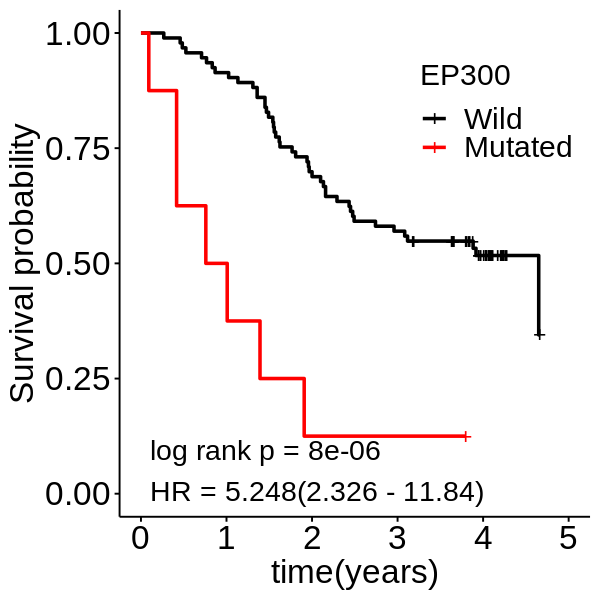

In [37]:
options(repr.plot.width=5,repr.plot.height=5)
ggsurvplot(survfit(Surv(EP300$t.os,EP300$e.os)~Status,EP300),EP300,palette = c("black","red"),
          pval="log rank p = 8e-06\nHR = 5.248(2.326 - 11.84)",legend.title="EP300",legend.labs=c("Wild","Mutated"),
            legend=c(0.8,0.8),pval.coord=c(0.1,0.05),
          xlab="time(years)",pval.size = 6,
          font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),)
pdf("EP300_mutation_survival.pdf",width=5,height=5,onefile=FALSE)
ggsurvplot(survfit(Surv(EP300$t.os,EP300$e.os)~Status,EP300),EP300,palette = c("black","red"),
          pval="log rank p = 8e-06\nHR = 5.248(2.326 - 11.84)",legend.title="EP300",legend.labs=c("Wild","Mutated"),
            legend=c(0.8,0.8),pval.coord=c(0.1,0.05),
          xlab="time(years)",pval.size = 6,
          font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),)
dev.off()
pdf("EP300_CREBBP_mutation_survival.pdf",width=5,height=5,onefile=FALSE)

ggsurvplot(survfit(Surv(EP300_CREBBP$t.os,EP300_CREBBP$e.os)~Status1,EP300_CREBBP),EP300_CREBBP,palette = c("black","red"),
          pval="log rank p = 0.02\nHR = 2.229(1.14 - 4.357)",legend.title="EP300 or CREBBP",legend.labs=c("Wild","Mutated"),
            legend=c(0.7,0.85),pval.coord=c(0.1,0.05),
          xlab="time(years)",pval.size = 6,
          font.x=c(20),font.y=c(20),font.xtickslab = c(20),font.ytickslab = c(20),font.legend=c(18),)
dev.off()

In [38]:
library(reshape2)

In [39]:
head(EP300_stem)

,Status,Group,ENSG00000100393,XCL1,XCL2,SFRP1,LGR6,VWA2,PEG10,WFDC2,CD160
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ESC00000000298,Wild,Differentiated,7.015603,3.499272,2.388860,0.3528991,-1.1196129,4.1508136,2.312838,5.4210039,2.612017
ESC00000000412,Wild,Differentiated,7.115053,3.891119,2.633105,6.0874062,1.7318121,2.6061211,3.128616,1.8308262,3.259120
ESC00000000464,Wild,Differentiated,6.962464,2.925179,1.467458,3.1778521,-0.3324323,1.2166219,3.870602,0.2293943,2.600232
ESC00000000427,Wild,Differentiated,7.434220,3.567780,2.229509,2.5061331,-0.5226102,0.4580418,2.922331,2.9560636,2.967033
ESC00000000413,Wild,Differentiated,7.343436,3.235088,1.606000,5.7154162,-0.3733490,2.0022635,2.362038,1.8365501,2.610454
ESC00000000386,Wild,Differentiated,7.438745,4.013925,2.762613,6.8828457,1.4105717,2.1145330,2.253101,3.3358630,2.933393


In [40]:

Ep300_express=EP300_stem$ENSG00000100393

dat=melt(EP300_stem[,c(1,2,4:11)])

Using Status, Group as id variables



In [41]:
head(dat)

,Status,Group,variable,value
,<fct>,<chr>,<fct>,<dbl>
1,Wild,Differentiated,XCL1,3.499272
2,Wild,Differentiated,XCL1,3.891119
3,Wild,Differentiated,XCL1,2.925179
4,Wild,Differentiated,XCL1,3.567780
5,Wild,Differentiated,XCL1,3.235088
6,Wild,Differentiated,XCL1,4.013925


In [42]:
dat$variable=factor(as.character(dat$variable),levels=c("XCL1","XCL2","CD160","WFDC2","PEG10","SFRP1","LGR6","VWA2"))

Warning message in brewer.pal(2, "Set1"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


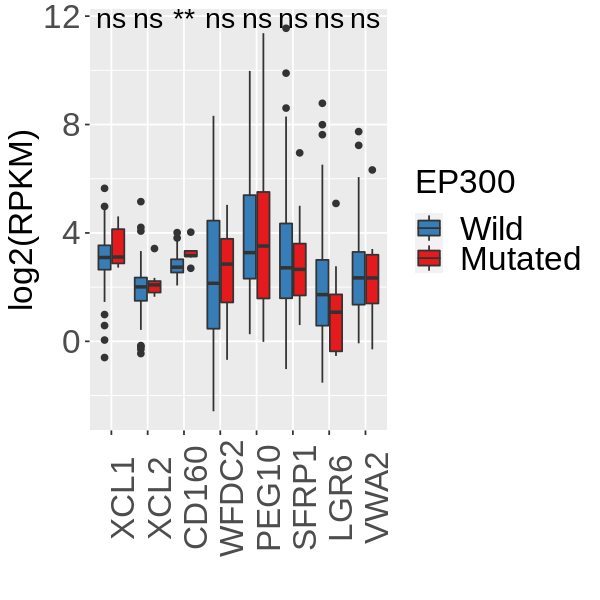

In [43]:
colnames(dat)[1]="EP300"
ggplot(dat,aes(x=variable,y=value,fill=EP300))+geom_boxplot()+
scale_fill_manual(values=rev(brewer.pal(2,"Set1")[1:2]))+
labs(x="",y="log2(RPKM)")+
stat_compare_means(label = "p.signif",size=6)+
theme(axis.text=element_text(size=20),
      axis.text.x=element_text(angle=90,size=20),
     axis.title=element_text(size=20),
     legend.text=element_text(size=20),
     legend.title=element_text(size=20))

In [44]:
cor(cbind(Ep300_express,stem_genes))

,Ep300_express,XCL1,XCL2,SFRP1,LGR6,VWA2,PEG10,WFDC2,CD160
Ep300_express,1.0000000,0.18102295,0.2346373,-0.12031461,0.1610833,0.1123393,0.14573147,0.11881323,0.20685619
XCL1,0.1810229,1.00000000,0.7776010,0.24288471,0.3960713,0.3635657,0.19916783,0.09315141,0.29390772
XCL2,0.2346373,0.77760103,1.0000000,0.18870041,0.3946219,0.3530804,0.28111505,0.17033335,0.32532077
SFRP1,-0.1203146,0.24288471,0.1887004,1.00000000,0.3804925,0.2153280,0.04119674,0.18664608,0.36521179
LGR6,0.1610833,0.39607133,0.3946219,0.38049251,1.0000000,0.4271566,0.39529135,0.22583457,0.32276284
VWA2,0.1123393,0.36356572,0.3530804,0.21532804,0.4271566,1.0000000,0.34069640,0.49187288,0.26983151
PEG10,0.1457315,0.19916783,0.2811150,0.04119674,0.3952913,0.3406964,1.00000000,0.31977801,0.09678701
WFDC2,0.1188132,0.09315141,0.1703333,0.18664608,0.2258346,0.4918729,0.31977801,1.00000000,0.11697720
CD160,0.2068562,0.29390772,0.3253208,0.36521179,0.3227628,0.2698315,0.09678701,0.11697720,1.00000000


In [45]:
EP300_wild=EP300[EP300$Status=="Wild",]

surv_cut=surv_cutpoint(data=EP300_wild,time="t.os",event="e.os",variables =c("ENSG00000100393") )
surv_cat = surv_categorize(surv_cut,labels = c("low","High"))

In [46]:
summary(coxph(Surv(surv_cat$t.os,surv_cat$e.os)~surv_cat$ENSG00000100393))

Call:
coxph(formula = Surv(surv_cat$t.os, surv_cat$e.os) ~ surv_cat$ENSG00000100393)

  n= 93, number of events= 45 

                              coef exp(coef) se(coef)     z Pr(>|z|)
surv_cat$ENSG00000100393low 0.4957    1.6416   0.3125 1.586    0.113

                            exp(coef) exp(-coef) lower .95 upper .95
surv_cat$ENSG00000100393low     1.642     0.6092    0.8898     3.029

Concordance= 0.568  (se = 0.037 )
Likelihood ratio test= 2.61  on 1 df,   p=0.1
Wald test            = 2.52  on 1 df,   p=0.1
Score (logrank) test = 2.57  on 1 df,   p=0.1


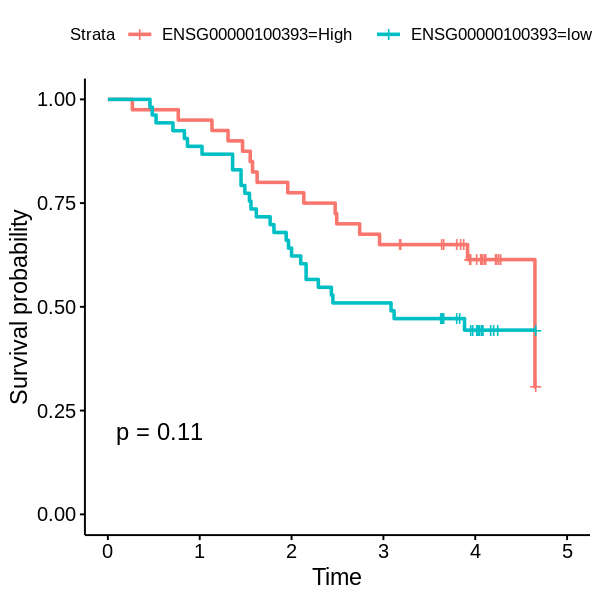

In [47]:
ggsurvplot(survfit(Surv(surv_cat$t.os,surv_cat$e.os)~ENSG00000100393,surv_cat),pval=TRUE)

In [48]:
cor.test(Ep300_express,stem_genes$XCL1)


	Pearson's product-moment correlation

data:  Ep300_express and stem_genes$XCL1
t = 1.9994, df = 118, p-value = 0.04786
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.001841355 0.348942230
sample estimates:
      cor 
0.1810229 


In [49]:
head(EP300_stem)

,Status,Group,ENSG00000100393,XCL1,XCL2,SFRP1,LGR6,VWA2,PEG10,WFDC2,CD160
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ESC00000000298,Wild,Differentiated,7.015603,3.499272,2.388860,0.3528991,-1.1196129,4.1508136,2.312838,5.4210039,2.612017
ESC00000000412,Wild,Differentiated,7.115053,3.891119,2.633105,6.0874062,1.7318121,2.6061211,3.128616,1.8308262,3.259120
ESC00000000464,Wild,Differentiated,6.962464,2.925179,1.467458,3.1778521,-0.3324323,1.2166219,3.870602,0.2293943,2.600232
ESC00000000427,Wild,Differentiated,7.434220,3.567780,2.229509,2.5061331,-0.5226102,0.4580418,2.922331,2.9560636,2.967033
ESC00000000413,Wild,Differentiated,7.343436,3.235088,1.606000,5.7154162,-0.3733490,2.0022635,2.362038,1.8365501,2.610454
ESC00000000386,Wild,Differentiated,7.438745,4.013925,2.762613,6.8828457,1.4105717,2.1145330,2.253101,3.3358630,2.933393


In [50]:
cor.test(Ep300_express,stem_genes$XCL2)


	Pearson's product-moment correlation

data:  Ep300_express and stem_genes$XCL2
t = 2.622, df = 118, p-value = 0.009893
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05782805 0.39717480
sample estimates:
      cor 
0.2346373 


In [51]:
cor.test(Ep300_express,stem_genes$CD160)


	Pearson's product-moment correlation

data:  Ep300_express and stem_genes$CD160
t = 2.2967, df = 118, p-value = 0.0234
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.02867815 0.37229392
sample estimates:
      cor 
0.2068562 


In [52]:
dat1=data.frame(variable=c(rep("CD160",120),rep("XCL1",120),rep("XCL2",120)),
            EP300=rep(Ep300_express,times=3),
           value=c(stem_genes$CD160,stem_genes$XCL1,stem_genes$XCL2))

`geom_smooth()` using formula 'y ~ x'



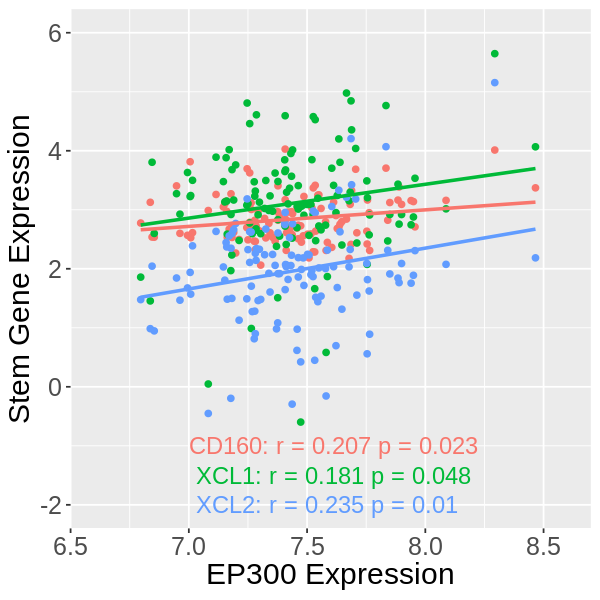

In [53]:
options(repr.plot.width=5,repr.plot.height=5)
p=ggplot(dat1,aes(x=EP300,y=value,color=variable))+geom_point()+geom_smooth(method="lm",se = FALSE)+
labs(x="EP300 Expression",y="Stem Gene Expression")+xlim(6.6,8.6)+ylim(-2,6)+
annotate(geom="text", x=7., y=-1, hjust=0, size=5,
         label="CD160: r = 0.207 p = 0.023",color="#F8776D")+
annotate(geom="text", x=7., y=-1.5, hjust=0,size=5,
         label=" XCL1: r = 0.181 p = 0.048",color="#00BA38")+
annotate(geom="text", x=7., y=-2,hjust=0,size=5,
         label=" XCL2: r = 0.235 p = 0.01",color="#619CFF")+
theme(legend.position = "none",axis.title = element_text(size=18),axis.text = element_text(size=15))
p

In [54]:
pdf("EP300_express_correlated_XCL1_2_CD160.pdf",width=5,height=5)
p
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

In [55]:
exp_set=express[,paste0(rownames(EP300),"T")]

In [56]:
library(limma)

In [57]:
design=model.matrix(~EP300$Status)

In [58]:
rownames(design)=paste0(rownames(EP300),"T")
#colnames(design)[2]="EP300"

In [59]:
#v <- voom(exp_set, design)
fit <- lmFit(exp_set, design) 

In [60]:
fit  <- eBayes(fit, trend=FALSE)

In [61]:
topGenes=topTable(fit,number = Inf)

Removing intercept from test coefficients



In [62]:
tx2gene=read.table("../zhong/esc/validate_data/tx2gene.txt",stringsAsFactors = FALSE)

In [63]:
tx2gene=tx2gene[tx2gene$V1 %in% rownames(topGenes),c(1,3)]
tx2gene=tx2gene[-which(duplicated(tx2gene)),]
rownames(tx2gene)=tx2gene$V1
topGenes$Gene_symbol=tx2gene[rownames(topGenes),"V3"]

In [64]:
EP300_mut_DEG=topGenes

In [65]:
EP300_wild=EP300[EP300$Status=="Wild",]

In [66]:
EP300_wild=EP300_wild[order(EP300_wild$ENSG00000100393),]

In [67]:
bottom20=paste(rownames(EP300_wild)[1:20],"T",sep="")
top20=paste(rownames(EP300_wild)[74:93],"T",sep="")

In [68]:
exp_set_wild=exp_set[,c(bottom20,top20)]

In [69]:
design1=model.matrix(~rep(c(0,1),each=20))
rownames(design1)=c(bottom20,top20)
colnames(design1)[2]="Group"

In [70]:
fit1 <- lmFit(exp_set_wild, design1) 
fit1  <- eBayes(fit1, trend=FALSE)
EP300_wild_DEG=topTable(fit1,number = Inf)

Removing intercept from test coefficients



In [71]:
EP300_wild_DEG$Gene_symbol=tx2gene[rownames(EP300_wild_DEG),"V3"]

In [72]:
head(EP300_wild_DEG)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene_symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000100393,0.6574148,7.454517,10.589750,2.519991e-13,7.056478e-09,16.319209,EP300
ENSG00000184068,0.7819794,4.411048,6.560789,6.766673e-08,9.474020e-04,7.026545,RP5-821D11.7
ENSG00000100147,0.7552017,3.632160,6.193397,2.258188e-07,2.107793e-03,6.066287,CCDC134
ENSG00000100359,0.5105880,5.657287,5.685982,1.193118e-06,8.352419e-03,4.726212,SGSM3
ENSG00000100239,0.4441925,5.756821,5.512991,2.100877e-06,1.176575e-02,4.267497,PPP6R2
ENSG00000100354,0.4981980,7.499311,5.455199,2.537089e-06,1.184059e-02,4.114207,TNRC6B


In [73]:
head(EP300_mut_DEG)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,Gene_symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000173064,0.7554441,7.360084,5.271193,7.595198e-07,0.006941710,5.417753,HECTD4
ENSG00000145996,1.3385558,5.675076,5.243210,8.560470e-07,0.006941710,5.312892,CDKAL1
ENSG00000051825,0.8083785,5.151990,5.242244,8.595831e-07,0.006941710,5.309279,MPHOSPH9
ENSG00000111011,0.5068203,6.332620,5.208721,9.916020e-07,0.006941710,5.184065,RSRC2
ENSG00000100281,0.6494799,5.308875,5.116558,1.465076e-06,0.008205014,4.842055,HMGXB4
ENSG00000196917,0.6515303,2.192080,4.950026,2.938150e-06,0.013712347,4.232704,HCAR1


In [74]:
write.table(EP300_wild_DEG,'EP300_wild_DEG.txt',quote=FALSE)

In [75]:
write.table(EP300_mut_DEG,'EP300_Mutation_VS_Wild_DEG.txt',quote=FALSE)

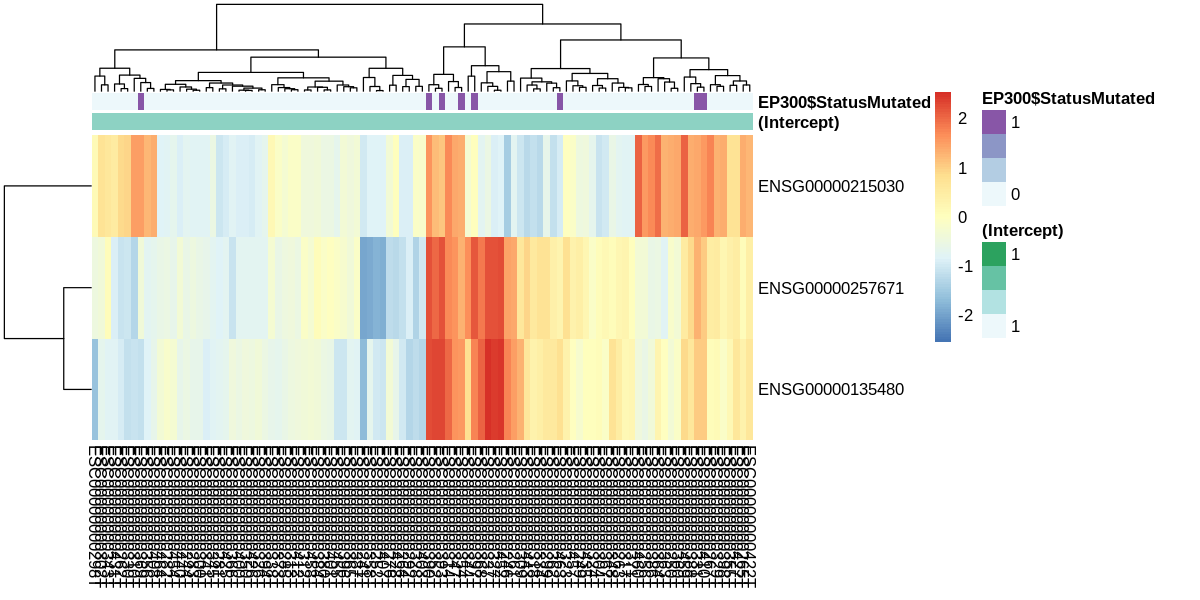

In [76]:
library(pheatmap)
options(repr.plot.width=10,repr.plot.height=5)
pheatmap(exp_set[rownames(EP300_mut_DEG[EP300_mut_DEG$logFC>2,]),],scale="row",annotation_col = as.data.frame(design))

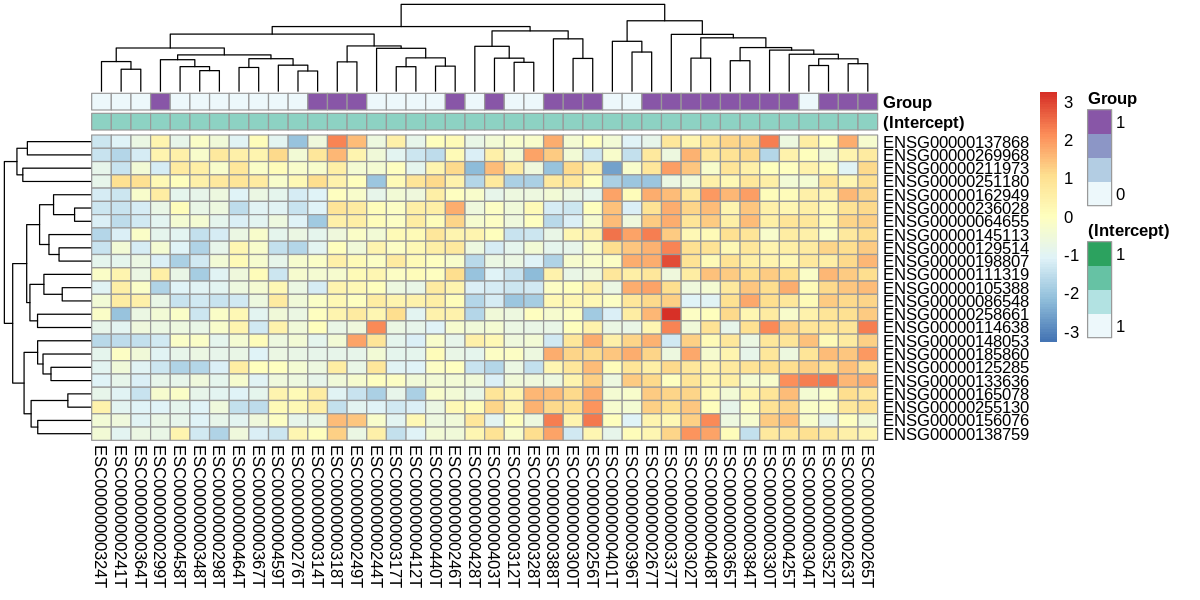

In [77]:
pheatmap(exp_set_wild[rownames(EP300_wild_DEG[EP300_wild_DEG$logFC>1.5,]),],scale="row",annotation_col = as.data.frame(design1))

In [78]:
mutations[mutations$Hugo_Symbol=="EP300",c("Start_Position","Tumor_Sample_Barcode","HGVSp")]

Start_Position,Tumor_Sample_Barcode,HGVSp
<int>,<fct>,<chr>
41569781,ESC00000000331,p.His1591Pro
41565575,ESC00000000354,p.Tyr1414Cys
41566435,ESC00000000369,p.Cys1438Arg
41568668,ESC00000000390,
41551100,ESC00000000393,p.Gln1082Ter
41537085,ESC00000000397,p.Tyr638Ter
41572395,ESC00000000410,p.Ser1643_Leu1644insProSer
41566478,ESC00000000463,p.Pro1452Arg


In [79]:
mutdat=data.frame(source = c("369_DNA","369_RNA","390_DNA"	, "390_RNA", "463_DNA","463_RNA"),
ALT=c(107,206,23,35,45,116),
REF=c(108,136,142,4,150,180),stringAsFactor=FALSE)

In [80]:
mutdat$source=as.character(mutdat$source)

In [81]:
mutdat$REF_fraction=mutdat$REF/(mutdat$REF+mutdat$ALT)
mutdat$ALT_fraction=mutdat$ALT/(mutdat$REF+mutdat$ALT)

In [82]:
dat=data.frame(allele=c(rep("Reference",6),rep("Alternative",6)),
fraction=round(c(mutdat$REF_fraction,mutdat$ALT_fraction),3),
source=c(mutdat$source,mutdat$source),
              sample=rep(c("369","390","463"),each=2),
              count=c(mutdat$REF,mutdat$ALT))

In [83]:
dat

allele,fraction,source,sample,count
<fct>,<dbl>,<fct>,<fct>,<dbl>
Reference,0.502,369_DNA,369,108
Reference,0.398,369_RNA,369,136
Reference,0.861,390_DNA,390,142
Reference,0.103,390_RNA,390,4
Reference,0.769,463_DNA,463,150
Reference,0.608,463_RNA,463,180
Alternative,0.498,369_DNA,369,107
Alternative,0.602,369_RNA,369,206
Alternative,0.139,390_DNA,390,23


In [84]:
library(gridExtra)
library(grid)

In [85]:
library(ggsignif)
library(ggpubr)
options(repr.plot.width=7,repr.plot.height=5)
p1=ggplot(subset(dat,sample=="369"),aes(x=source,y=fraction,fill=allele))+geom_bar(stat = "identity")+
    scale_fill_manual(values=rev(brewer.pal(3,"Set1")[1:2]))+
    labs(x="",y="Fraction")+ylim(-0.02,1.1)+
    geom_signif(
    comparisons = list(c("369_DNA", "369_RNA")),
    textsize = 6,annotations ="0.02",vjust=-0.15,y=1.03,tip_length = 0.2,linetype = "blank") +
    theme(legend.position = "none",axis.title = element_text(size=18),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))


p2=ggplot(subset(dat,sample=="390"),aes(x=source,y=fraction,fill=allele))+geom_bar(stat = "identity")+
    scale_fill_manual(values=rev(brewer.pal(3,"Set1")[1:2]))+
    labs(x="",y="")+ylim(-0.02,1.1)+
    geom_signif(
    comparisons = list(c("390_DNA", "390_RNA")),
    textsize = 6,annotations ="0.0001",vjust=-0.05,y=1.03,tip_length = 0.08,linetype = "blank") +
    theme(legend.position = "none",axis.title = element_text(size=18),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

p3=ggplot(subset(dat,sample=="463"),aes(x=source,y=fraction,fill=allele))+geom_bar(stat = "identity")+
scale_fill_manual(values=rev(brewer.pal(3,"Set1")[1:2]))+
labs(x="",y="")+ylim(-0.02,1.1)+
geom_signif(
    comparisons = list(c("463_DNA", "463_RNA")),
    textsize = 6,annotations ="0.0002",vjust=0,y=1.03,tip_length = 0,linetype = "blank"
 ) +
theme(legend.position = "none",axis.title = element_text(size=18),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

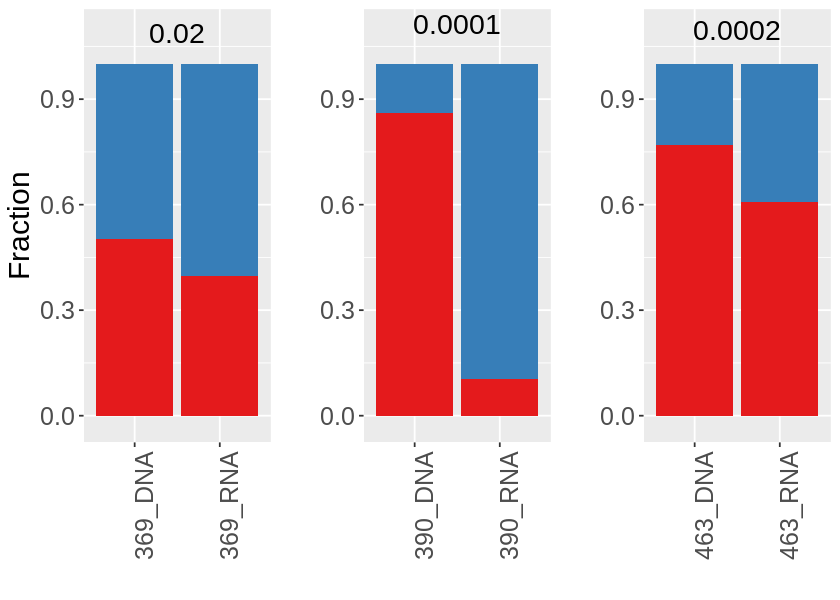

In [86]:
grid.arrange(p1,p2,p3,ncol=3)

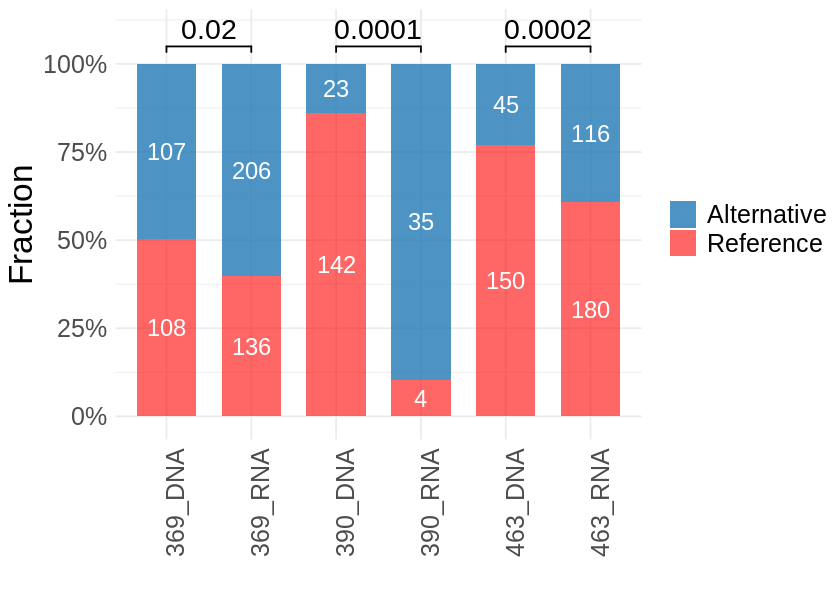

In [87]:
ggplot(dat,aes(x=source,y=fraction,fill=allele,width=0.70))+geom_bar(stat = "identity")+
    geom_text(aes(label=count,group=allele),
              color="white",position = position_fill(vjust=0.5),size=5)+
    scale_fill_manual(values=c('#1f77b4ca','#FF000098'))+
    scale_y_continuous(breaks =c(0,0.25,0.5,0.75,1), labels=c("0%","25%","50%","75%","100%"),limits =c(-0.01,1.1) )+
    labs(x="",y="Fraction")+
    geom_signif(
    comparisons = list(c("369_DNA", "369_RNA"),c("390_DNA", "390_RNA"),c("463_DNA", "463_RNA")),
    textsize = 6,annotations =c("0.02","0.0001","0.0002"),vjust=-0.15,y=1.01,tip_length = 0.02) +
    theme_minimal()+
    theme(legend.position = "right",legend.title=element_blank(),
          legend.text=element_text(size=15),
          axis.title = element_text(size=20),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

In [88]:
p1=ggplot(subset(dat,sample=="369"),aes(x=source,y=fraction,fill=allele,width=0.70))+geom_bar(stat = "identity")+
    geom_text(aes(label=count,group=allele),
              color="white",position = position_fill(vjust=0.5),size=5)+
    scale_fill_manual(values=c('#1f77b4ca','#FF000098'))+
    scale_y_continuous(breaks =c(0,0.25,0.5,0.75,1), labels=c("0%","25%","50%","75%","100%"),limits =c(-0.01,1.1) )+
    labs(x="",y="Fraction")+
    geom_signif(
    comparisons = list(c("369_DNA", "369_RNA")),
    textsize = 6.5,annotations ="*",vjust=-0.15,y=1.025,tip_length = 0.05) +
    theme(legend.position = "none",axis.title = element_text(size=20),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

In [89]:
p2=ggplot(subset(dat,sample=="390"),aes(x=source,y=fraction,fill=allele,width=0.70))+geom_bar(stat = "identity")+
    geom_text(aes(label=count,group=allele),
              color="white",position = position_fill(vjust=0.5),size=5)+
    scale_fill_manual(values=c('#1f77b4ca','#FF000098'))+
     scale_y_continuous(breaks =c(0,0.25,0.5,0.75,1), labels=c("0%","25%","50%","75%","100%"),limits =c(-0.01,1.1) )+
    labs(x="",y="Fraction")+
    geom_signif(
    comparisons = list(c("390_DNA", "390_RNA")),
    textsize = 6.5,annotations ="***",vjust=-0.15,y=1.01,tip_length = 0.02) +
    theme(legend.position = "none",axis.title = element_text(size=20),axis.text = element_text(size=15),axis.text.x = element_text(angle=90))

In [90]:
p3=ggplot(subset(dat,sample=="463"),aes(x=source,y=fraction,fill=allele,width=0.70))+geom_bar(stat = "identity")+
    geom_text(aes(label=count,group=allele),
              color="white",position = position_fill(vjust=0.5),size=5)+
    scale_fill_manual(values=c('#1f77b4ca','#FF000098'))+
    scale_y_continuous(breaks =c(0,0.25,0.5,0.75,1), labels=c("0%","25%","50%","75%","100%"),limits =c(-0.01,1.1))+
    labs(x="",y="Fraction")+
    geom_signif(
    comparisons = list(c("463_DNA", "463_RNA")),
    textsize = 6.5,annotations ="***",vjust=-0.15,y=1.01,tip_length = 0.02) +
    theme(legend.title = element_blank(),
          legend.position="right",
          legend.text = element_text(size=15),
          axis.title = element_text(size=20),
          axis.text = element_text(size=15),
          axis.text.x = element_text(angle=90))

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


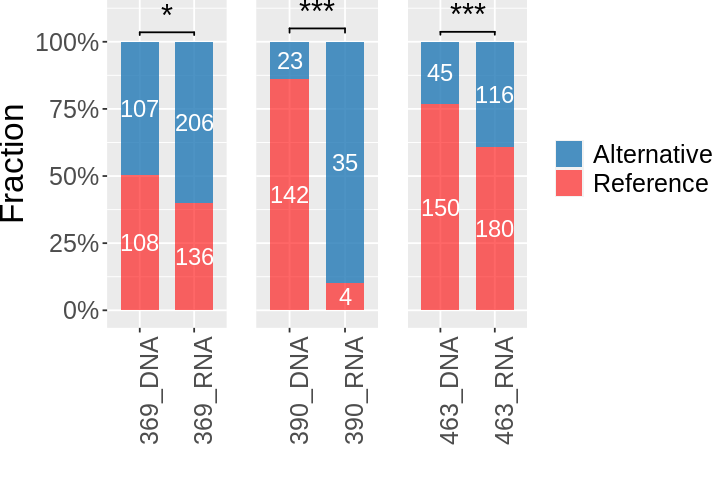

In [91]:
options(repr.plot.width=6,repr.plot.height=4)
cowplot::plot_grid(p1+theme(plot.margin = margin(0, 0, 0, 0)), 
                   p2 + 
                        theme(axis.text.y = element_blank(),
                              axis.ticks.y = element_blank(),
                              axis.title.y = element_blank(),plot.margin = margin(0, 15, 0,15)), 
                   p3 + 
                        theme(axis.text.y = element_blank(),
                              axis.ticks.y = element_blank(),
                              axis.title.y = element_blank(),
                               plot.margin = margin(0, 0, 0, 0),
                               legend.position="right"),
                   nrow = 1,
                    rel_widths = c(3.15,2.45,4.4),
                   labels = "",
                   align = "v")

In [93]:
save(dat,EP300,EP300_CREBBP,file="Figure4CDEF.rdata")